In [1]:
print("start importing")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
sys.path.append('../../')
from src.models.networks.sqnet import SketchNetwork, QueryNetworkTask, SketchNetworkResLN
from src.datasets.zipf import get_zipf_probs, get_dataset_samples, ZipfOnlineDatasetLoader
from src.models.frequency.sketch_algorithms import SketchQueryalgorithms
from src.scripts.frequency_membership.train_sqn import train_network,eval_network,define_networks
from src.scripts.frequency_membership.plots import compute_test

print('done importing!')

start importing
start importing
start importing
done importing!
done importing!


This notebook evaluates the networks trained with zipf dataset doing a plot with errors of CM/CS/SQNet/RFQNet

In [2]:
## Setup device
device = 'cuda:0'

# Sketch size 100

## Read and evaluate models

In [5]:
# Read config sqnet
import hjson
with open('../../configs/config_frequencymodel_sk100.txt') as json_file:
    hparams = hjson.load(json_file)

In [4]:
# Define some parameters
#name = 'Max'
name = 'Mean'
num = 4
hparams['num_hidden'] = num
hparams["residual_sketch_net"]=0
activation = 'gelu'
hparams['both_sq_rfq']= 1
hparams['num_samples']= 100
hparams['var']= 0.6

In [9]:
# Define the models
hparams['sq_snet']='../../results/networks/networks_sketch_100/networks_frequency_sqnet/snet_sq_'+name+'.pth'
hparams['sq_qnet']='../../results/networks/networks_sketch_100/networks_frequency_sqnet/qnet_sq_'+name+'.pth'

hparams['rf_snet']='../../results/networks/networks_sketch_100/networks_frequency_rf/snet_sq_'+activation+'0.6.pth'
hparams['rf_qnet']='../../results/networks/networks_sketch_100/networks_frequency_rf/qnet_sq_'+activation+'0.6.pth'
hparams['type_lastlayer_sq']= name
hparams['activation']= activation
hparams['path_opt_CM'] = '../../results/benchmark_wd/optimum_w_d_CM_sketch_100.csv'
hparams['path_opt_CS'] = '../../results/benchmark_wd/optimum_w_d_CS_sketch_100.csv'



CS (W=20,D=5)
CM (W=20,D=5)
SQNet
RFQNet
All 0s


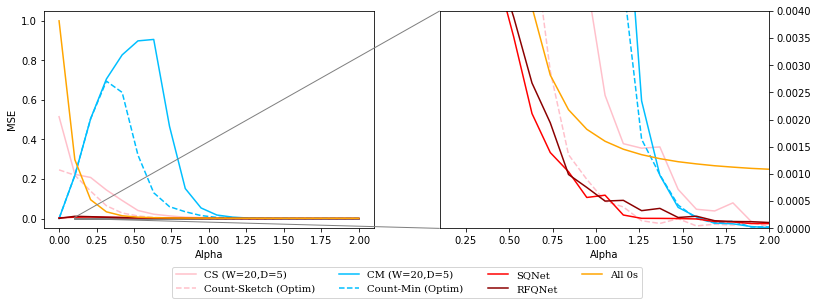

In [7]:
# Define networks
hparams['train_SN_QN']=0

SN_rf,QN_rf = define_networks(hparams)
# Load the networks
SN_rf.load_state_dict(torch.load(hparams['rf_snet']))
QN_rf.load_state_dict(torch.load(hparams['rf_qnet']))
SN_rf.eval()
QN_rf.eval()
hparams['train_SN_QN']=1
# Define networks
SN,QN = define_networks(hparams)
# Load the networks 
SN.load_state_dict(torch.load(hparams['sq_snet']))
QN.load_state_dict(torch.load(hparams['sq_qnet']))
SN.eval()
QN.eval()


hparams['train_SN_QN']=1
# Plot the errors with different alphas and Beta 0.5 and 1
compute_test(SN,QN,hparams,device,SN_rf,QN_rf)

## Sketch size 10

In [3]:
# Read config sqnet
import hjson
with open('../../configs/config_frequencymodel_sk100.txt') as json_file:
    hparams = hjson.load(json_file)

In [4]:
hparams['sketch_size'] = 10
name = 'Min'
num = 1
hparams['num_hidden'] = num
hparams["residual_sketch_net"]=0
activation = 'gelu' # cos
hparams['both_sq_rfq']= 1
var = 0.005
hparams["num_samples"] = 100 
hparams['d'] = 5
hparams['w'] = 2

In [5]:
# Define path models
# SQNet
hparams['sq_snet']='../../results/networks/networks_sketch_10/networks_frequency_sqnet/' + 'snet_sq_'+ name +'.pth' #_lr0.0001
hparams['sq_qnet']='../../results/networks/networks_sketch_10/networks_frequency_sqnet/' + 'qnet_sq_'+ name +'.pth'

# RFQnet
hparams['rf_snet']='../../results/networks/networks_sketch_10/networks_frequency_rf/' + 'snet_sq_'+ activation +'0.6.pth' #_lr0.0001
hparams['rf_qnet']='../../results/networks/networks_sketch_10/networks_frequency_rf/' + 'qnet_sq_'+ activation +'0.6.pth'


hparams['activation']= activation
hparams['type_lastlayer_sq']= name
hparams['var'] = var
hparams['save_plots'] = 1

hparams["path_opt_CM"] = '../../results/benchmark_wd/optimum_w_d_CM_sketch_10.csv'
hparams["path_opt_CS"] = '../../results/benchmark_wd/optimum_w_d_CS_sketch_10.csv'


1.0
Creation of the directory ../../results/plots_zipf/ failed


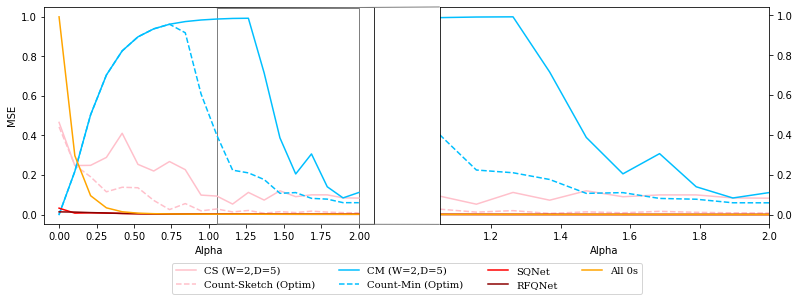

1.0
Creation of the directory ../../results/plots_zipf/ failed


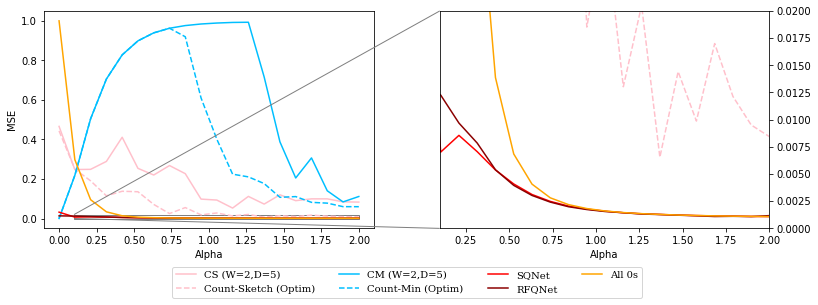

In [6]:
# Define networks
hparams['train_SN_QN']=0

SN_rf,QN_rf = define_networks(hparams)
# Load the networks
SN_rf.load_state_dict(torch.load(hparams['rf_snet']))
QN_rf.load_state_dict(torch.load(hparams['rf_qnet']))
SN_rf.eval()
QN_rf.eval()
hparams['train_SN_QN']=1
# Define networks
SN,QN = define_networks(hparams)
# Load the networks 
SN.load_state_dict(torch.load(hparams['sq_snet']))
QN.load_state_dict(torch.load(hparams['sq_qnet']))
SN.eval()
QN.eval()

hparams['train_SN_QN']=1
# Compute plots
compute_test(SN,QN,hparams,device,SN_rf,QN_rf)